# Package

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import csv

In [ ]:
class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x

In [ ]:
model = Network()

In [ ]:
type(model)

In [ ]:
for name, param in model.named_parameters():
    print(f"{name}: {param.size()}")

In [ ]:
def get_weight(config):
    AUs_num = config.DATA.CLASS_NUM
    aus = ['AU'+str(au_name) for au_name in config.DATA.AU_LIST]
    with open(config.DATA.SOURCE.TRAIN_LIST, 'r') as f:
        reader = csv.DictReader(f)
        labels = np.array([[int(row[au]) for au in aus] for row in reader])
        all_ = [len(labels)] * AUs_num
        positive = np.sum(labels, 0)

    negative = np.array(all_) - positive

    weight_cls = WeightNorm(positive.tolist(), negative.tolist())
    norm_weight = weight_cls.normalize()
    norm_weight =  np.array(norm_weight)
    norm_weight = norm_weight.tolist()
    norm_weight = torch.FloatTensor(norm_weight)
    return norm_weight

# 修改tensor的维度的函数

In [ ]:
import torch

In [ ]:
# 1.reshape

x1 = torch.randn((128, 512, 7, 7))
x2 = torch.randn((128, 512, 7, 7))

In [ ]:
torch.stack([x1, x2]).shape  # (2, 128, 512, 7, 7)

# 余弦退火算法

In [ ]:
model = nn.Linear(256, 5)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.1)

epochs = 100

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

In [ ]:
y = [scheduler.get_last_lr()[0]]
print(f"Initial Learning Rate: {scheduler.get_last_lr()[0]:.6f}")
for epoch in range(epochs):
    # 训练模型
    optimizer.step()
    
    # 更新学习率
    scheduler.step()
    
    # 打印当前学习率
    print(f"Epoch {epoch+1}/{epochs}, Learning Rate: {scheduler.get_last_lr()[0]:.6f}")
    y.append(scheduler.get_last_lr()[0])

In [ ]:
plt.plot(range(epochs+1), y)

# Transforming and augmenting images

In [ ]:
import torch
from torchvision.transforms import v2

In [ ]:
H, W = 32, 32
img = torch.randint(0, 256, size=(3, H, W), dtype=torch.uint8)

In [ ]:
plt.imshow(img.permute(1, 2, 0))

# Cross Entropy

In [ ]:
input = torch.randn(3, 3, requires_grad=True)
target = torch.randint(3, (3,), dtype=torch.int64)
loss = F.cross_entropy(input, target, reduction='none')
loss

In [ ]:
input

In [ ]:
target

In [ ]:
target = torch.randint(2, (3, 3), dtype=torch.int64)

In [ ]:
target.bool()

In [ ]:
row_1 = input[0]

In [ ]:
row_1_log_softmax = F.log_softmax(input)
row_1_log_softmax

In [ ]:
F.nll_loss(row_1_log_softmax, target, reduction='none')

In [ ]:
target

In [ ]:
target /target.sum(dim=1).unsqueeze(1)

In [ ]:
target.sum(dim=1)

In [ ]:
row_1_log_softmax[target.bool()]

In [ ]:
pos = -torch.where(target.bool(), row_1_log_softmax, torch.tensor(0))

In [ ]:
pos

In [ ]:
pos.sum(dim=1) 

In [ ]:
pos.sum(dim=1)  / target.sum(dim=1)

In [ ]:
pos.mean()

In [ ]:
torch.div(12, 0+1e-8)

In [ ]:
import torch
import pdb

In [ ]:
def compare_matrix_rows_no_loop(pseudo_label, labels):
    row_equal = torch.eq(pseudo_label, labels).all(dim=1) # 比较每一行
    count = torch.sum(row_equal).item() #计算相等行数
    print(f"Count: {count}")
    return count

In [ ]:

pseudo_label = torch.tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
                             [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
                             [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')
labels = torch.tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
                       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')

compare_matrix_rows_no_loop(pseudo_label, labels)

# CLIP

In [ ]:
import clip

In [ ]:
dir(clip)

In [ ]:
clip.available_models()

In [ ]:
# RN50中没有dropout
# 参数冻结的CLIP模型中

clip_model, _ = clip.load('RN50', device='cpu')

In [ ]:
# clip_model

In [ ]:
# clip_model
# clip
# ----visual
# ----transformer
# ----token_embedding
# ----ln_final

In [ ]:
for module in clip_model.modules():
    if isinstance(module, nn.Dropout):
        print(f"{module}")

In [ ]:
# clip_model.visual

In [ ]:
images = torch.randn(1, 3, 224, 224)
output = clip_model.encode_image(images)
output.shape

# 学习率调度策略

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [23]:
lr_list = []

epochs = 30
model = nn.Linear(200, 10)
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
for epoch in range(epochs):
    print(f"E({epoch}): lr:{scheduler.get_last_lr()}")
    lr_list.append(scheduler.get_last_lr()[0])
    scheduler.step()

E(0): lr:[0.1]
E(1): lr:[0.09000000000000001]
E(2): lr:[0.08100000000000002]
E(3): lr:[0.07290000000000002]
E(4): lr:[0.06561000000000002]
E(5): lr:[0.05904900000000002]
E(6): lr:[0.05314410000000002]
E(7): lr:[0.04782969000000002]
E(8): lr:[0.043046721000000024]
E(9): lr:[0.03874204890000002]
E(10): lr:[0.03486784401000002]
E(11): lr:[0.03138105960900001]
E(12): lr:[0.028242953648100012]
E(13): lr:[0.025418658283290013]
E(14): lr:[0.022876792454961013]
E(15): lr:[0.020589113209464913]
E(16): lr:[0.01853020188851842]
E(17): lr:[0.01667718169966658]
E(18): lr:[0.015009463529699923]
E(19): lr:[0.013508517176729932]
E(20): lr:[0.01215766545905694]
E(21): lr:[0.010941898913151246]
E(22): lr:[0.009847709021836121]
E(23): lr:[0.00886293811965251]
E(24): lr:[0.007976644307687259]
E(25): lr:[0.007178979876918534]
E(26): lr:[0.006461081889226681]
E(27): lr:[0.005814973700304013]
E(28): lr:[0.005233476330273611]
E(29): lr:[0.00471012869724625]


/home/yiren/anaconda3/envs/uda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


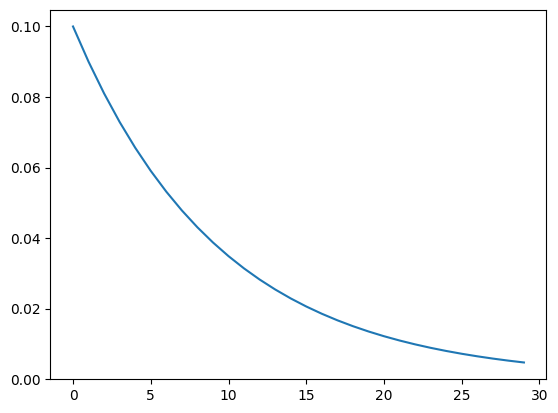

In [26]:
plt.plot(lr_list)

# 领域自适应中遍历数据集的写法

In [39]:
from torch.utils.data import Dataset, DataLoader

In [40]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
class DataSetTest(Dataset):
    
    def __init__(self, data, label):
        super().__init__()
        self.data = data
        self.label = label
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        result = self.data[index]
        return result, self.label

In [58]:
source_dataset = DataSetTest(np.arange(50), 0)
target_dataset = DataSetTest(np.arange(120), 1)

In [59]:
source_loader = DataLoader(source_dataset, batch_size=25)
target_loader = DataLoader(target_dataset, batch_size=25)

In [60]:
for x,y in source_loader:
    print(f"{x}")

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])
tensor([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46, 47, 48, 49])


In [61]:
for x,y in target_loader:
    print(f"{x}")

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])
tensor([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46, 47, 48, 49])
tensor([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74])
tensor([75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
        93, 94, 95, 96, 97, 98, 99])
tensor([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119])


In [62]:
# 这种办法不行的
for x,y in zip(source_loader, target_loader):
    print(f"{y}")

[tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1])]
[tensor([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46, 47, 48, 49]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1])]


In [63]:
# 在一个迭代器耗尽时，重新创建该迭代器。
source_iter = iter(source_loader)
for batch_idx, (x_t, y_t) in enumerate(target_loader): # 放target以尽可能的利用目标域的无标签数据
    try:
        x_s, y_s = next(source_iter)
    except:
        source_iter = iter(source_loader)
        x_s, y_s = next(source_iter)
    print(f"batch: {batch_idx}")
    print(f"t_x: {x_t}")
    print(f"s_x: {x_s}")

batch: 0
t_x: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])
s_x: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])
batch: 1
t_x: tensor([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46, 47, 48, 49])
s_x: tensor([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46, 47, 48, 49])
batch: 2
t_x: tensor([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74])
s_x: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])
batch: 3
t_x: tensor([75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
        93, 94, 95, 96, 97, 98, 99])
s_x: tensor([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46, 4